In [3]:
# 데이터 처리을 위한 Pandas 및 Numpy
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np


# 시각화를 위한 matplotlib 및 seaborn
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns


# pandas에서 나오는 경고문 무시
# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

## 예시 : 고객의 이전 대출 수량 파악 (Counts of a client's previous loans)
Manual feature engineering의 보편적인 방법을 설명하기 위해, 먼저 고객의 과거 타 금융기관에서의 대출 수량을 간단히 파악하고자 합니다. 이 과정은 이 커널에서 반복적으로 사용되는 아래의 Pandas 명령어들을 포함합니다.

    groupby : Column값에 따라 데이터프레임을 그룹화. 이 과정에서는 SK_ID_CURR Column의 값에 따라 고객별로 데이터프레임을 그룹화 (Link)
    agg : 그룹화된 데이터의 평균 등을 계산. 'grouped_df.mean()' 을 통해 직접 평균을 계산하거나, agg 명령어와 리스트를 활용하여 평균, 최대값, 최소값, 합계 등을 계산 ( grouped_df.agg([mean, max, min, sum]) ) (Link)
    merge : 집계된(aggregated) 값을 해당 고객와 매칭. SK_ID_CURR Column을 활용하여 집계된 값을 원본 트레이닝 데이터로 병합하고, 해당값이 없을 경우에는 NaN 값을 입력.(Link)
    
또한 rename 명령어를 통해 Column을 dict을 활용하여 변경합니다. 이러한 방식은 생성된 변수들을 계속해서 추적하는데 유용합니다.

이러한 과정이 길게 느껴질 수도 있기 때문에, 추후 이러한 과정을 대신 해줄 함수(function)를 작성할 예정입니다. 우선 수작업으로 시행하는 과정을 살펴봅시다.

In [4]:
#bureau 파일 읽기
bureau = pd.read_csv('./bureau.csv')
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [5]:
# 고객 id (SK_ID_CURR)를 기준으로 groupby 실행, 이전 대출 갯수를 파악하고, Column 이름을 변경
# Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column
previous_loan_counts=bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [6]:
# 훈련용 데이터프레임과 병합(Join)
# Join to the training dataframe

train = pd.read_csv('./application_train.csv')
train = train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

#NAN값에 0을 대입
train['previous_loan_counts'] = train['previous_loan_counts'].fillna(0)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,previous_loan_counts
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,8.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## R Value를 활용한 변수 유용성 평가 (Assessing Usefulness of New Variable with r value)

새롭게 생성된 Column의 변수들이 유용한지 판단하기 위해, 우선 목표값(target)과 해당 변수간의 피어슨 상관계수 (Pearson Correlation Coefficient, r-value)를 계산하고자 합니다. 두 변수 사이의 선형관계(linear relationship)는 -1(완벽하게 음의 선형관계)에서부터 +1(완벽히 양의 선형관계) 사이의 값으로 표현됩니다. r-value가 변수의 유용성을 평가하기 위한 최선의 방식은 아니지만, 머신러닝 모델을 발전시키는데 효과가 있을 지에 대한 대략적인 정보를 줄 수 있습니다. 목표값에 대한 r-value가 커질 수록, 해당 변수가 목표값에 영향을 끼칠 가능성이 높아집니다. 그러므로 목표값에 대해 가장 큰 r-value의 절댓값을 가지는 변수를 찾고자 합니다.

또한 우리는 커널밀도추정그래프(Kernal Density Estimate Plot)을 활용하여 목표값과의 상관관계를 시각적으로 살펴볼 것입니다.


## 커널밀도추정그래프(Kernal Density Estimate Plots)
커널밀도추정그래프는 단일 변수의 분포를 보여줍니다.(히스토그램을 부드럽게한(smoothed) 것으로 생각해보면 될 것입니다.) 범주형 변수(Categorical Variable)의 값 차이에 따른 분포를 차이를 보기위해, 카테고리에 따라 색을 다르게 칠하도록 하겠습니다. 예를 들어, TARGET 값이 0인지 1인지에 따라 색을 다르게 칠한 previous_loan_count의 커널밀도추정그래프를 그릴 수 있습니다. 이러한 그래프는 대출을 상환한 그룹(TARGET==0)과 그렇지 못한 그룹(TARGET==1)의 분포에 있어 차이점들을 보여줄 것입니다. 이는 변수들이 머신러닝 모델과 관련성을 가지는 지를 보여줄 수있는 지표로 활용될 수 있습니다.

In [7]:
# 변수의 분포에 따른 그래프 target값을 달리하여 작성

def kde_target(var_name, df):
    '''
    Args
    input
    var_name = str, 변수가 되는 Column
    df : Dataframe, 대상 데이터프레임
    
    return: None
    '''
    
    #새롭게 생성된 변수와 target간의 상관관계수를 계산
    corr = df['TARGET'].corr(df[var_name])
    
    #대출을 상환환 그룹과 그렇지 않은 그룹의 중간값(medain) 계산
    avg_repaid = df.ix[df['TARGET']==0,var_name].median()
    avg_not_repaid = df.ix[df['TARGET']==1,var_name].median()
    
    plt.figure(figsize = (12,6))
    
    #target값에 때라 색을 달리하여 그래프 작성
    sns.kdeplot(df.ix[df['TARGET']==0,var_name],label ='TARGET==0')
    sns.kdeplot(df.ix[df['TARGET']==1,var_name],label ='TARGET==1')
    
    #그래프 라벨링
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution'%var_name)
    plt.legend();
    
    #상관계수 출력
    print('The correlation between %s and the TARGET is %0.4f'% (var_name,corr))
    
    #중간값 출력
    print('The median value for loan that was not repaid = %0.4f' %avg_not_repaid)
    print('The median value for loan that was repaid = %0.4f'% avg_repaid)
    

Random Forest 및 Gradient Boosting Machine에 의해 가장 중요한 변수로 판명된 EXT_SOURCE_3를 활용하여 테스트하도록 하겠습니다.

The correlation between EXT_SOURCE_3 and the TARGET is -0.1789
The median value for loan that was not repaid = 0.3791
The median value for loan that was repaid = 0.5460


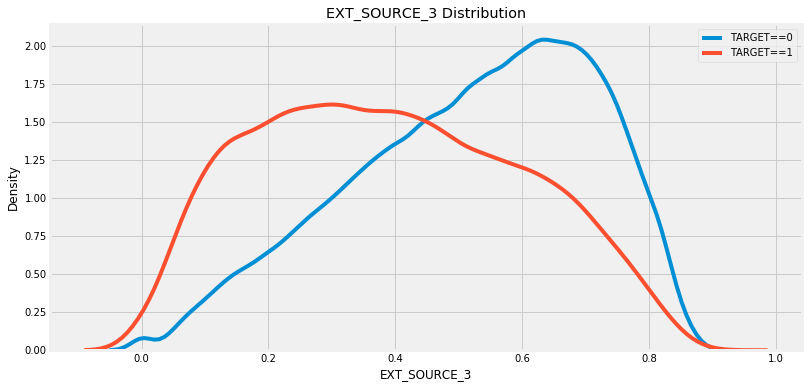

In [8]:
kde_target('EXT_SOURCE_3',train)

이제는 방금 새롭게 만들었던 previous_loan_counts를 살펴보자

The correlation between previous_loan_counts and the TARGET is -0.0100
The median value for loan that was not repaid = 3.0000
The median value for loan that was repaid = 4.0000


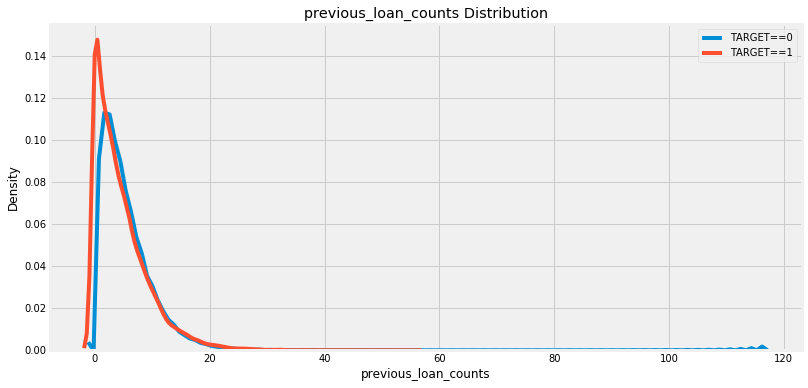

In [9]:
kde_target('previous_loan_counts', train)

previous_loan_counts가 별로 중요하지 않음을 알 수 있다. 상관계수가 너무 작으며,target값에 의한 분포의 차이도 별로 없다.
이제 bureau 데이터프레임으로부터 몇개의 변수들을 새롭게 생성해보자. bureau 데이터프레임의 모든 수치 데이터 column들로부터 평균, 최소, 최댓값을 가져오겠습니다.

# 수치 데이터들의 대푯값을 계산(Aggregating Numeric Columns)

(*agg를 활용하여 데이터프레임의 평균, 최대값, 최소값, 합계 등을 구하는 것을 대표값들을 계산한다고 번역하였습니다.)

bureau 데이터 프레임 안의 수치 데이터를 활용하기 위해, 모든 수치 데이터 Column의 대표값들을 계산할 것입니다. 이를 위해 고객 ID별로 그룹화(groupby)를 수행하고, 그룹화된 데이터프레임의 대표값들을 agg를 통해 구한 뒤, 결과를 훈련 데이터셋과 병합합니다. agg 함수는 오직 수치 데이터행들의 유효한 대표값들을 계산하는 역할을 수행합니다. 계속해서 mean, max, min, sum 함수를 기본으로 사용할 것이지만, 상황에 따라 어떠한 함수들은 생략될 수 있습니다. 또한, 별도의 함수를 작성한 후 이를 agg 함수를 통해 불러올 수 있습니다.

In [10]:
#고객 id에 따라 데이터프레임을 그룹화하고, 대푯값들을 계산
bureau_agg = bureau.drop(columns= ['SK_ID_BUREAU']).groupby('SK_ID_CURR',as_index = False).agg(['count','mean','max','min','sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                 ...    DAYS_CREDIT_UPDATE                               \
  mean max min   ...                 count        mean  max   min   sum   
0  0.0   0   0   ...                     7  -93.142857   -6  -155  -652   
1  0.0   0   0   ...                     8 -499.875000   -7 -1185 -3999   
2  0.0   0   0   ...                     4 -816.000000  -43 -2131 -3264   
3  0.0   0   0   ...                     2 -532.000000 -382  -682 -1064   
4  0.0   0   0   ...                     3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [11]:
bureau.dtypes.value_counts()

float64    8
int64      6
object     3
dtype: int64

agg를 통해서 columns의 대푯값을 계산해 보여주는 bureau_agg를 만들었다. 데이터프레임의 types를 살펴봤을떄 61columns이므로 countm ,mean,max,min,sum 이 5개이므로 'SK_ID_CURR'을 제외한 60/5 인 12개의 column들에 대한 정보를 제공했다고 볼 수 있는데 dtype count해서 확인한 결과 object를 제외한 14개의 column 중 SK_ID_CURR과 ID_BUREAU를 제외한 수치를제공하는 12개 column에 관한것이다.

In [13]:
# Column 리스트를 생성 
columns = ['SK_ID_CURR']

# 변수(원본 데이터프레임의 column name)에 따라 반복문을 실행
for var in bureau_agg.columns.levels[0]:
    
    # id column은 생략
    if var != 'SK_ID_CURR':
        
        # 대표값의 종류에 따라 반복문을 생성
        for stat in bureau_agg.columns.levels[1][:-1]:
        
            # 변수 및 대표값의 종류에 따라 새로운 column name을 생성
                columns.append('bureau_%s_%s' % (var, stat))

In [23]:
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100001,7,-735.000000,-49,-1572,-5145,7,0.0,0,0,...,7,-93.142857,-6,-155,-652,7,3545.357143,10822.5,0.0,24817.5
1,100002,8,-874.000000,-103,-1437,-6992,8,0.0,0,0,...,8,-499.875000,-7,-1185,-3999,7,0.000000,0.0,0.0,0.0
2,100003,4,-1400.750000,-606,-2586,-5603,4,0.0,0,0,...,4,-816.000000,-43,-2131,-3264,0,NaN,NaN,NaN,0.0
3,100004,2,-867.000000,-408,-1326,-1734,2,0.0,0,0,...,2,-532.000000,-382,-682,-1064,0,NaN,NaN,NaN,0.0
4,100005,3,-190.666667,-62,-373,-572,3,0.0,0,0,...,3,-54.333333,-11,-121,-163,3,1420.500000,4261.5,0.0,4261.5


In [24]:
#훈련데이터와 병합
train = train.merge(bureau_agg , on = 'SK_ID_CURR', how = 'left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,8.0,-499.875,-7.0,-1185.0,-3999.0,7.0,0.0,0.0,0.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.0,-816.000,-43.0,-2131.0,-3264.0,0.0,NaN,NaN,NaN,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,2.0,-532.000,-382.0,-682.0,-1064.0,0.0,NaN,NaN,NaN,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1.0,-783.000,-783.0,-783.0,-783.0,0.0,NaN,NaN,NaN,0.0


## 목표값과 대수값들의 상관계수 분석

새로 생성된 값들과 목표값(target)과의 상관계수를 분석한다. 다시 말하자면, 이러한 상관계수들은 모델링에 중요한 변수들을 대략적으로 알려줍니다.

In [25]:
# 새로운 상관계수들에 대한 리스트를 생성
# List of new correlations
new_corrs = []

# column별로 반복문을 실행
for col in columns:
    
    # 목표값(target)과의 상관계수를 계산
    # Calculate correlation with the target
    corr = train['TARGET'].corr(train[col])
    
    # 튜플(tuple)로 리스트에 추가
    # Append the list as a tuple
    new_corrs.append((col, corr))

In [36]:
new_corrs

[('SK_ID_CURR', -0.002108469018197723),
 ('bureau_DAYS_CREDIT_count', 0.0040560913193898014),
 ('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('bureau_DAYS_CREDIT_max', 0.049782054639973095),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484684),
 ('bureau_CREDIT_DAY_OVERDUE_count', 0.0040560913193898014),
 ('bureau_CREDIT_DAY_OVERDUE_mean', 0.008118453706602049),
 ('bureau_CREDIT_DAY_OVERDUE_max', 0.00549262648777457),
 ('bureau_CREDIT_DAY_OVERDUE_min', 0.007573067345301717),
 ('bureau_CREDIT_DAY_OVERDUE_sum', 0.0062982607264991455),
 ('bureau_DAYS_CREDIT_ENDDATE_count', -0.004002209425084467),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483543),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329046),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.03428110992161599),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05373489560102051),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325547),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758661)

sorted함수를 통해서 상관계수들을 절댓값에 따라서 정렬하자.또한 lambda함수를 활용하자

In [37]:
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True )

In [39]:
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.08972896721998122),
 ('bureau_DAYS_CREDIT_min', 0.0752482510301036),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968668),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.05588737984392113),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.05373489560102051),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758661),
 ('bureau_DAYS_CREDIT_max', 0.049782054639973095),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.04885350261111589),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483543),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.042863922470730176),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484684),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.04140363535306004),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.036589634696329046),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.03428110992161599),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.030492306653325547)]

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
The median value for loan that was not repaid = -835.3333
The median value for loan that was repaid = -1067.0000


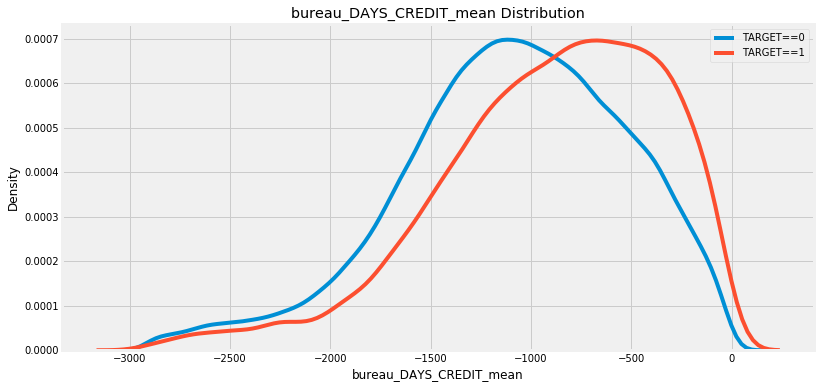

In [40]:
kde_target('bureau_DAYS_CREDIT_mean',train)

이 column은 '고객이 신용관리국 신용등급을 신청한 날로부터 현 대출신청까지 걸린 기간은 몇 일인가'에 데이터입니다. 이것은 이전 대출을 받고나서 'Home Credit'에서 대출을 받기전까지 걸린 일수(the number of days)로 해석하려 합니다. 그러므로 마이너스 수치가 크다는 것은 이전 대출이 이루어진 시점이 더 오래됐음을 의미합니다. 여기서 이 변수의 평균들과 목표값(target)이 매우 약한 양의 상관관계를 갖는 다는 것은 더 오래된 과거에 대출을 신청했던 고객들은 'Home Credit'에서 대출을 상환할 가능성이 높다는 것을 의미한다. 그러나 이렇게 약한 상관관계는 그저 노이즈일 가능성도 있다.

### 다중비교문제(The Multiple Comparions Problem)

이전의 작업들을 요약하여, 수치데이터의 대표값 계산을 위한 함수를 생성한다.
이 함수는 데이터프레임 전체에 걸쳐 수치 데이터 column들의 대표값들을 계산하는 역할을 수행하고 추후에 이 함수를 활용하도록 하겠다.

In [41]:
def agg_numeric(df, group_var, df_name):
    '''
    데이터프레임안의 수치데이터에 한하여 대표값들을 계산합니다. 이것은 새로운 feature들을 만드는 데 활용될 수 있습니다.
    
    파라미터(Parameters)
    -------------------
        df (dataframe): 연산의 대상이되는 데이터프레임 (the dataframe to calculate the statistics on)
        group_var (string): 그룹화(groupby)의 기준이되는 column (the variable by which to group df)
        df_name (string): column명을 재정의하는데 쓰이는 변수 (the variable used to rename the columns)
        
    출력값(Returns)
    -------------------
        agg (dataframe): 
            모든 수치데이터 column들의 대표값들이 연산된 데이터프레임. 각각의 그룹화된 인스턴스들은 대표값(평균, 최소값, 최대값, 합계)
            들을 가짐. 또한, 새롭게 생성된 feature들을 구분하기위해 column들의 이름을 재정의        
    
    '''
    
    #그룹화 대상이 아닌 id들을 제거
    for col in df:
        if  col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids
    
    #특정 변수들을 그룹화하고 대표값들을 계산
    agg = numeric_df.groupby(group_var).agg(['count','mean','max','min','sum']).reset_index()
    
    #새로운 column 이름들을  생성
    columns = [group_var]
    
    #변수(원본 데이터프레임의 column name)에 따라 반복문을 실행
    for var in agg.columns.levels[0]:
        
        #id column은 생략
        if var != group_var:
            
            #대표값의 종류에 따라 반복문을 새엇ㅇ
            for stat in agg.columns.levels[1][:-1]:
                
                #변수 및 대표값의 종류에 따라 새로운 column name을 생성
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg